Q.In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array movements of daily price movements from 2010 to 2015, where each row corresponds to a company, and each column corresponds to a trading day.
Some stocks are more expensive than others.


Provide Solution of which company have stock prices that tend to change in the same way? Now inspect the cluster labels from your clustering to find out.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
stocks=pd.read_csv("D:/Dixant/CDAC/Machine Learning/20-12-21/stocks.csv",index_col=0)

In [3]:
stocks.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [4]:
stocks.shape

(60, 963)

In [5]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
sse = []
kmeans = range(1,30)
for k in kmeans:
    km = KMeans(n_clusters=k)
    km.fit(stocks)
    sse.append(km.inertia_)

print(sse)

[133634.0722706578, 76036.13469254087, 51411.38935737611, 27001.34221699222, 16922.759963240373, 13106.539972930319, 11102.703145584435, 9872.90145994024, 9018.252984872825, 8432.834871650984, 7865.457737689118, 7464.666555611783, 6958.909764391615, 6409.527900204896, 6058.043725352394, 5612.069818707103, 5268.850025268968, 4996.55453698977, 4758.466044214455, 4385.908317340671, 4105.209780077792, 3811.650146544909, 3608.5972453338445, 3427.7440879359056, 3284.172199890491, 3050.5219854808115, 2812.3245425781233, 2687.160767256643, 2445.4169279506687]


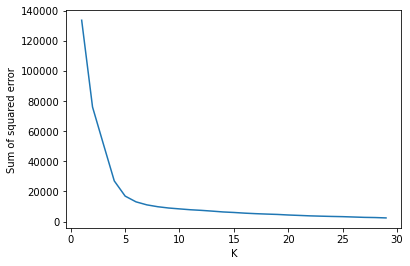

In [7]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(kmeans,sse)

In [8]:
km = KMeans(n_clusters=8)
y_predicted = km.fit_predict(stocks)
y_predicted

array([2, 7, 5, 6, 6, 7, 6, 7, 6, 7, 6, 7, 6, 6, 7, 7, 7, 1, 4, 7, 7, 7,
       7, 0, 7, 7, 6, 7, 7, 6, 3, 7, 6, 7, 7, 6, 6, 7, 7, 7, 7, 7, 6, 6,
       6, 7, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7])

# Using PCA for Ploting in 2D

In [9]:
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(stocks)
print(scaled)

[[ 0.4496197  -0.38038084 -1.30603921 ... -2.51168159  0.61220263
  -5.74259972]
 [-1.36172667 -0.92679173  0.04971049 ...  0.02078649 -0.74336873
   0.11144388]
 [-3.90058279  1.50032885 -0.85695009 ...  2.32002256 -2.23010689
   1.00184359]
 ...
 [ 0.22691503  0.19145242  0.38017522 ... -0.08394087  0.1311819
   0.05940875]
 [-0.27788708 -0.0881048   0.1047883  ...  0.02554728 -0.28422918
  -0.08802742]
 [-0.17395902 -0.08810353  0.13868208 ...  0.01126587 -0.02186716
  -0.05044645]]


In [10]:
pca=PCA()

In [11]:
pca.fit(stocks)
pca.explained_variance_ratio_

array([4.89561270e-01, 1.84960625e-01, 1.52377675e-01, 5.83362656e-02,
       2.82327918e-02, 1.24607467e-02, 8.74028184e-03, 6.09966167e-03,
       5.84266194e-03, 4.04151362e-03, 3.78771904e-03, 3.39007627e-03,
       3.12389863e-03, 2.83622177e-03, 2.43804190e-03, 2.09304090e-03,
       1.99449965e-03, 1.88881202e-03, 1.79533967e-03, 1.70079752e-03,
       1.60511518e-03, 1.53641232e-03, 1.40584068e-03, 1.32403802e-03,
       1.24719594e-03, 1.21577074e-03, 1.16365807e-03, 1.12070736e-03,
       1.07345190e-03, 1.03906662e-03, 1.00163367e-03, 9.67604410e-04,
       8.75979151e-04, 8.36273480e-04, 7.74732379e-04, 7.39806085e-04,
       6.60008825e-04, 6.29975534e-04, 5.19806970e-04, 4.98442217e-04,
       4.11698193e-04, 3.93966367e-04, 3.85671045e-04, 3.33710802e-04,
       3.06386922e-04, 2.48559587e-04, 2.34412264e-04, 2.13612100e-04,
       1.97135805e-04, 1.91309779e-04, 1.79574003e-04, 1.71478847e-04,
       1.62890097e-04, 1.46543660e-04, 1.40344741e-04, 1.23842204e-04,
      

In [12]:
pca.explained_variance_ratio_.cumsum()

array([0.48956127, 0.6745219 , 0.82689957, 0.88523584, 0.91346863,
       0.92592937, 0.93466966, 0.94076932, 0.94661198, 0.95065349,
       0.95444121, 0.95783129, 0.96095519, 0.96379141, 0.96622945,
       0.96832249, 0.97031699, 0.9722058 , 0.97400114, 0.97570194,
       0.97730706, 0.97884347, 0.98024931, 0.98157335, 0.98282054,
       0.98403631, 0.98519997, 0.98632068, 0.98739413, 0.9884332 ,
       0.98943483, 0.99040244, 0.99127842, 0.99211469, 0.99288942,
       0.99362923, 0.99428924, 0.99491921, 0.99543902, 0.99593746,
       0.99634916, 0.99674313, 0.9971288 , 0.99746251, 0.99776889,
       0.99801745, 0.99825187, 0.99846548, 0.99866261, 0.99885392,
       0.9990335 , 0.99920498, 0.99936787, 0.99951441, 0.99965475,
       0.9997786 , 0.99988295, 0.99997116, 1.        , 1.        ])

Text(0, 0.5, 'Cumulative Explained Variance')

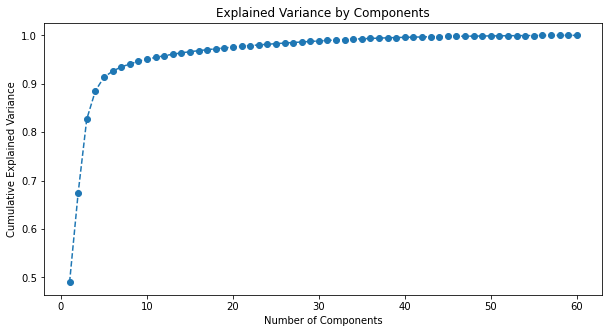

In [13]:
plt.figure(figsize=(10,5))
 
plt.plot (range (1,61), pca.explained_variance_ratio_.cumsum (), marker = 'o', linestyle = '--')
 
plt.title('Explained Variance by Components')
 
plt.xlabel('Number of Components')
 
plt.ylabel('Cumulative Explained Variance')

In [14]:
pca=PCA(n_components= 2)
pca.fit(stocks)
pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()

array([0.48956127, 0.6745219 ])

In [15]:
df= pca.transform(stocks)
print(df)
#new_df
#---------------------------#
df1=np.transpose(df)
PCA1=df1[0]
PCA2=df1[1]

[[ 1.21887764e+02  1.26339091e+02]
 [-6.81429742e+00 -1.14662578e+00]
 [ 4.17312139e+01 -3.00452862e+00]
 [-5.09377107e+00 -1.47321510e+00]
 [-2.92881597e+00 -8.03746911e-01]
 [-1.21035419e+01 -1.36548804e+00]
 [-6.73073018e+00 -8.96053385e-01]
 [-9.88514100e+00 -1.21077294e+00]
 [ 3.23052888e+00  2.64816168e+00]
 [-8.24852797e+00 -1.55997258e+00]
 [-5.82694011e+00 -8.03301524e-01]
 [-1.13304441e+01 -7.98041044e-01]
 [-9.95940789e-01  4.98277147e-01]
 [-7.03852293e+00 -1.18185582e-01]
 [-1.26570409e+01 -8.74740511e-01]
 [-1.20745477e+01 -1.12750933e+00]
 [-1.18583186e+01 -1.14633869e+00]
 [ 1.93266721e+02 -9.05912035e+01]
 [ 1.23778154e+01 -2.96749006e+00]
 [-1.06357158e+01 -1.27826046e+00]
 [-8.26661044e+00 -5.17528380e-01]
 [-1.04800534e+01 -1.29420499e+00]
 [-9.97340403e+00  2.88901422e-02]
 [ 8.21304775e+00  8.44775067e-01]
 [-1.11923249e+01 -8.62048309e-01]
 [-9.74197667e+00 -2.29473366e+00]
 [-7.03438612e+00 -1.32675732e+00]
 [-1.02074426e+01 -2.17995942e+00]
 [-9.91193923e+00 -1

In [16]:
km.cluster_centers_

array([[  1.270004  ,  -0.829987  ,  -0.679993  , ...,  -1.579987  ,
          0.310013  ,   4.5       ],
       [ -0.199995  ,  -3.189984  , -17.599998  , ..., -13.620034  ,
         -0.199995  ,  17.139948  ],
       [  0.58      ,  -0.220005  ,  -3.409998  , ...,  -5.359962  ,
          0.840019  , -19.589981  ],
       ...,
       [ -2.350006  ,   1.260009  ,  -2.350006  , ...,   4.790009  ,
         -1.760009  ,   3.740021  ],
       [  0.47888772,   0.26666622,   0.46277811, ...,   0.40333311,
          0.07389011,   0.21055517],
       [  0.18972189,   0.04333325,  -0.05916669, ...,   0.07277678,
          0.30333306,   0.21805508]])

In [17]:
df_plot= pd.DataFrame()
df_plot['pca1']=np.transpose(PCA1)
df_plot['pca2']=np.transpose(PCA2)
df_plot['cluster']=y_predicted
df_plot

,pca1,pca2,cluster
0,121.887764,126.339091,2
1,-6.814297,-1.146626,7
2,41.731214,-3.004529,5
3,-5.093771,-1.473215,6
4,-2.928816,-0.803747,6
5,-12.103542,-1.365488,7
6,-6.730730,-0.896053,6
7,-9.885141,-1.210773,7
8,3.230529,2.648162,6
9,-8.248528,-1.559973,7


In [18]:
df_plot1 = df_plot[df_plot.cluster==0]
df_plot2 = df_plot[df_plot.cluster==1]
df_plot3 = df_plot[df_plot.cluster==2]
df_plot4 = df_plot[df_plot.cluster==3]
df_plot5 = df_plot[df_plot.cluster==4]
df_plot6 = df_plot[df_plot.cluster==5]
df_plot7 = df_plot[df_plot.cluster==6]
df_plot8 = df_plot[df_plot.cluster==7]

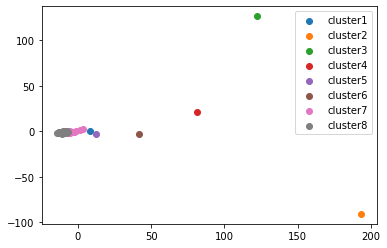

In [19]:
plt.figure()
plt.scatter(df_plot1['pca1'],df_plot1['pca2'],label='cluster1')
plt.scatter(df_plot2['pca1'],df_plot2['pca2'],label='cluster2')
plt.scatter(df_plot3['pca1'],df_plot3['pca2'],label='cluster3')
plt.scatter(df_plot4['pca1'],df_plot4['pca2'],label='cluster4')
plt.scatter(df_plot5['pca1'],df_plot5['pca2'],label='cluster5')
plt.scatter(df_plot6['pca1'],df_plot6['pca2'],label='cluster6')
plt.scatter(df_plot7['pca1'],df_plot7['pca2'],label='cluster7')
plt.scatter(df_plot8['pca1'],df_plot8['pca2'],label='cluster8')

plt.legend()
plt.show()

# Answer to the question

In [20]:
y_pred=pd.Series(y_predicted)

In [21]:
for i in df_plot.cluster.unique():
    print(stocks.iloc[np.where(y_pred == i)].index.values,"==> Cluster"+str(i))

['Apple'] ==> Cluster2
['AIG' 'Bank of America' 'Canon' 'Colgate-Palmolive' 'Cisco' 'Dell' 'Ford'
 'General Electrics' 'GlaxoSmithKline' 'Home Depot' 'Honda' 'HP' 'Intel'
 'Johnson & Johnson' 'Kimberly-Clark' 'Coca Cola' 'McDonalds' 'Microsoft'
 'Mitsubishi' 'Novartis' 'Pepsi' 'Pfizer' 'Procter Gamble' 'Philip Morris'
 'Sony' 'Sanofi-Aventis' 'Symantec' 'Taiwan Semiconductor Manufacturing'
 'Texas instruments' 'Unilever' 'Valero Energy' 'Walgreen' 'Wells Fargo'
 'Wal-Mart' 'Xerox' 'Yahoo'] ==> Cluster7
['Amazon'] ==> Cluster5
['American express' 'Boeing' 'British American Tobacco' 'Caterpillar'
 'ConocoPhillips' 'Chevron' 'DuPont de Nemours' 'JPMorgan Chase'
 'Lookheed Martin' '3M' 'Navistar' 'Northrop Grumman' 'Royal Dutch Shell'
 'SAP' 'Schlumberger' 'Toyota' 'Total' 'Exxon'] ==> Cluster6
['Google/Alphabet'] ==> Cluster1
['Goldman Sachs'] ==> Cluster4
['IBM'] ==> Cluster0
['MasterCard'] ==> Cluster3
